In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
data = np.load(r'D:\heat_wave\sea_level_pressure_93_19_all_area.npz')
data.files

['lat', 'lon', 'mslp']

In [3]:
mslp = data['mslp'][:]

In [4]:
mslp = mslp / 100

In [5]:
mslp.shape

(9855, 73, 144)

In [6]:
mslp

array([[[ 981.85,  981.85,  981.85, ...,  981.85,  981.85,  981.85],
        [ 978.3 ,  978.1 ,  977.85, ...,  978.97,  978.75,  978.55],
        [ 984.92,  984.6 ,  984.27, ...,  985.8 ,  985.5 ,  985.2 ],
        ...,
        [1003.07, 1003.25, 1003.37, ..., 1002.55, 1002.72, 1002.9 ],
        [1005.1 , 1005.27, 1005.47, ..., 1004.55, 1004.72, 1004.9 ],
        [1001.75, 1001.75, 1001.75, ..., 1001.75, 1001.75, 1001.75]],

       [[ 997.27,  997.27,  997.27, ...,  997.27,  997.27,  997.27],
        [ 994.77,  994.6 ,  994.37, ...,  995.37,  995.17,  994.97],
        [ 995.27,  994.9 ,  994.52, ...,  996.32,  995.97,  995.62],
        ...,
        [1000.67, 1000.7 , 1000.77, ..., 1000.7 , 1000.67, 1000.65],
        [1003.62, 1003.82, 1003.97, ..., 1003.15, 1003.3 , 1003.47],
        [1003.22, 1003.22, 1003.22, ..., 1003.22, 1003.22, 1003.22]],

       [[1005.17, 1005.17, 1005.17, ..., 1005.17, 1005.17, 1005.17],
        [1007.22, 1007.07, 1006.95, ..., 1007.62, 1007.5 , 1007.37],
    

In [7]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

nt, nlats, nlons = mslp.shape
print(mslp.shape) #(9855, 9, 7)
# 重塑为2D数组（time，lat*lon）
mslp2_2d = mslp.reshape(nt, nlats*nlons)

decomposition = seasonal_decompose(mslp2_2d, model='additive', period=12)

trend = decomposition.trend
for i in range(nlats*nlons):
    model = LinearRegression().fit(np.arange(nt).reshape(-1, 1), decomposition.observed[:, i])
    trend[:, i] = model.predict(np.arange(nt).reshape(-1, 1))
mslp_detrended = decomposition.observed - trend

# 重塑为3D数组（time，lat，lon）
mslp_detrended = mslp_detrended.reshape(nt, nlats, nlons)

mslp_detrended = mslp_detrended.reshape(-1,73,144)
print(mslp_detrended.shape)


print(np.mean(mslp_detrended))
print(np.max(mslp_detrended))
print(np.min(mslp_detrended))

(9855, 73, 144)
(9855, 73, 144)
-7.882902666305187e-16
44.715737455461976
-73.15511898899922


In [8]:
mslp_detrended = mslp_detrended[:,:,:]

In [9]:
mslp_detrended.shape

(9855, 73, 144)

In [15]:
mslp_detrended2 = mslp_detrended[100:200,:,:]

In [16]:
mslp_detrended1 = np.mean(mslp_detrended2, axis = 0)

In [17]:
mslp_detrended1

array([[5.4703506 , 5.4703506 , 5.4703506 , ..., 5.4703506 , 5.4703506 ,
        5.4703506 ],
       [5.72247516, 5.71473344, 5.6959182 , ..., 5.75579726, 5.74562165,
        5.73540316],
       [6.28526749, 6.26983647, 6.25209561, ..., 6.30732662, 6.30223258,
        6.29425077],
       ...,
       [4.17426234, 4.47381652, 4.78198553, ..., 3.3115787 , 3.59060065,
        3.87985944],
       [6.10558745, 6.26866527, 6.43235932, ..., 5.62845566, 5.78582364,
        5.94463564],
       [5.86350787, 5.86350787, 5.86350787, ..., 5.86350787, 5.86350787,
        5.86350787]])

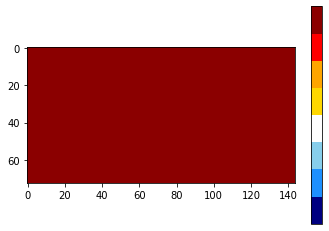

In [18]:
# 生成随机数据作为热力图的值
data = mslp_detrended1

# 定义颜色映射，白色为中心
cmap = ListedColormap(['navy', 'dodgerblue', 'skyblue', 'white', 'gold', 'orange', 'red', 'darkred'])

# 设置colorbar的范围为-6到6，白色为中心
norm = plt.Normalize(-30, -10)

# 绘制热力图
fig, ax = plt.subplots()
im = ax.imshow(data, cmap=cmap, norm=norm)

# 添加colorbar
cbar = ax.figure.colorbar(im, ax=ax, ticks=[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6])
cbar.ax.set_yticklabels(['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])

# 显示图形
plt.show()

In [32]:
mslp_detrended.shape

(73, 144)

C:\Users\mymylove\AppData\Local\Temp/ipykernel_28900/3495340581.py:8: ProplotWarning: 'LinearSegmentedColormap' was deprecated in version 0.8 and will be removed in a future release. Please use 'ContinuousColormap' instead.
  cmap = LinearSegmentedColormap(


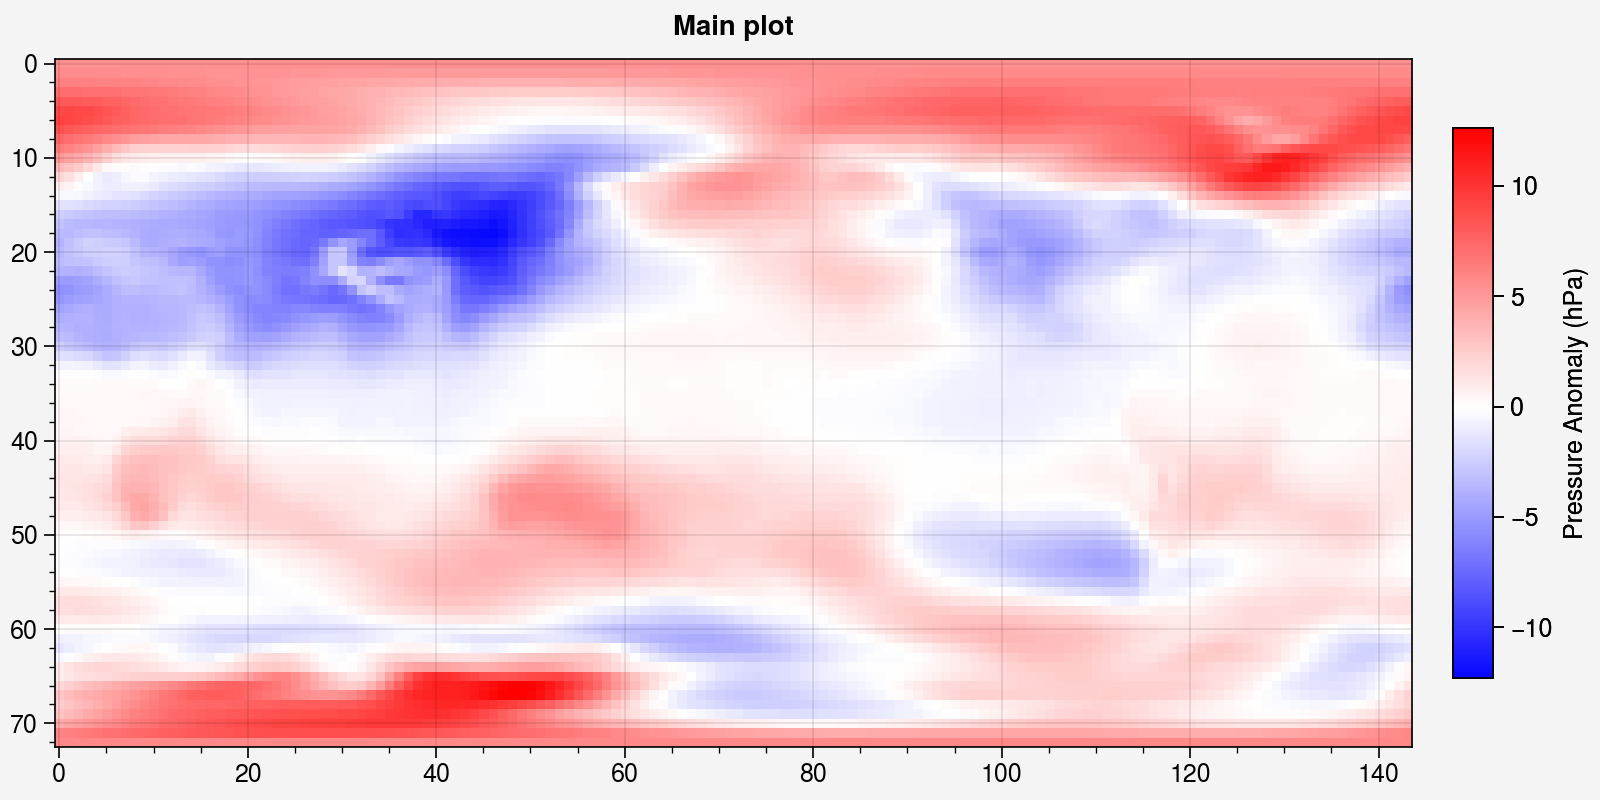

In [19]:
import proplot as plt
from proplot.colors import LinearSegmentedColormap, DivergingNorm

# 生成随机数据作为热力图的值
data = mslp_detrended1

# 创建一个颜色映射，白色为中心
cmap = LinearSegmentedColormap(
    'CustomMap', 
    {'red': [(0.0, 0.0, 0.0), (0.5, 1.0, 1.0), (1.0, 1.0, 1.0)],
     'green': [(0.0, 0.0, 0.0), (0.5, 1.0, 1.0), (1.0, 0.0, 0.0)],
     'blue': [(0.0, 1.0, 1.0), (0.5, 1.0, 1.0), (1.0, 0.0, 0.0)]}
)

# 创建一个标准化对象，用于设置颜色映射的范围，白色为中心
norm = DivergingNorm(vmin=-10, vcenter=0, vmax=10)

# 绘制热力图
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), span=False)
im = axs[0].imshow(data, cmap=cmap, norm=norm)
axs.format(suptitle='Main plot')

# 添加colorbar
cbar = fig.colorbar(im, loc='r', length=0.8, label='Pressure Anomaly (hPa)')

# # 使用 zoomin() 方法添加放大镜图像
# ax_zoom = axs[1].zoomin(data, 30, 50, 10, 20, border=True, color='k', alpha=0.5)
# axs.format(suptitle='Main plot with zoom-in')

# 显示图形
plt.show()